In [1]:
# !pip uninstall ultralytics -y
!pip install ultralytics==8.0.196

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 393, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

In [3]:
# !yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'


In [4]:
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [5]:
# !pip install roboflow --quiet

# from roboflow import Roboflow
# rf = Roboflow(api_key="LBhZZHIt26RfZ7Tj9rgd")
# project = rf.workspace("michael-micah-vocuu").project("carla-simulation-dataset-2")
# dataset = project.version(3).download("yolov8")


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9XdAHsKrzYkClDUj6dSW")
project = rf.workspace("micahmichael03").project("carla_object-detection")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Carla_Object-detection-1 in yolov8:: 100%|██████████| 2842/2842 [00:00<00:00, 6551.55it/s]


In [15]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

New https://pypi.org/project/ultralytics/8.2.81 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Carla_Object-detection-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, a

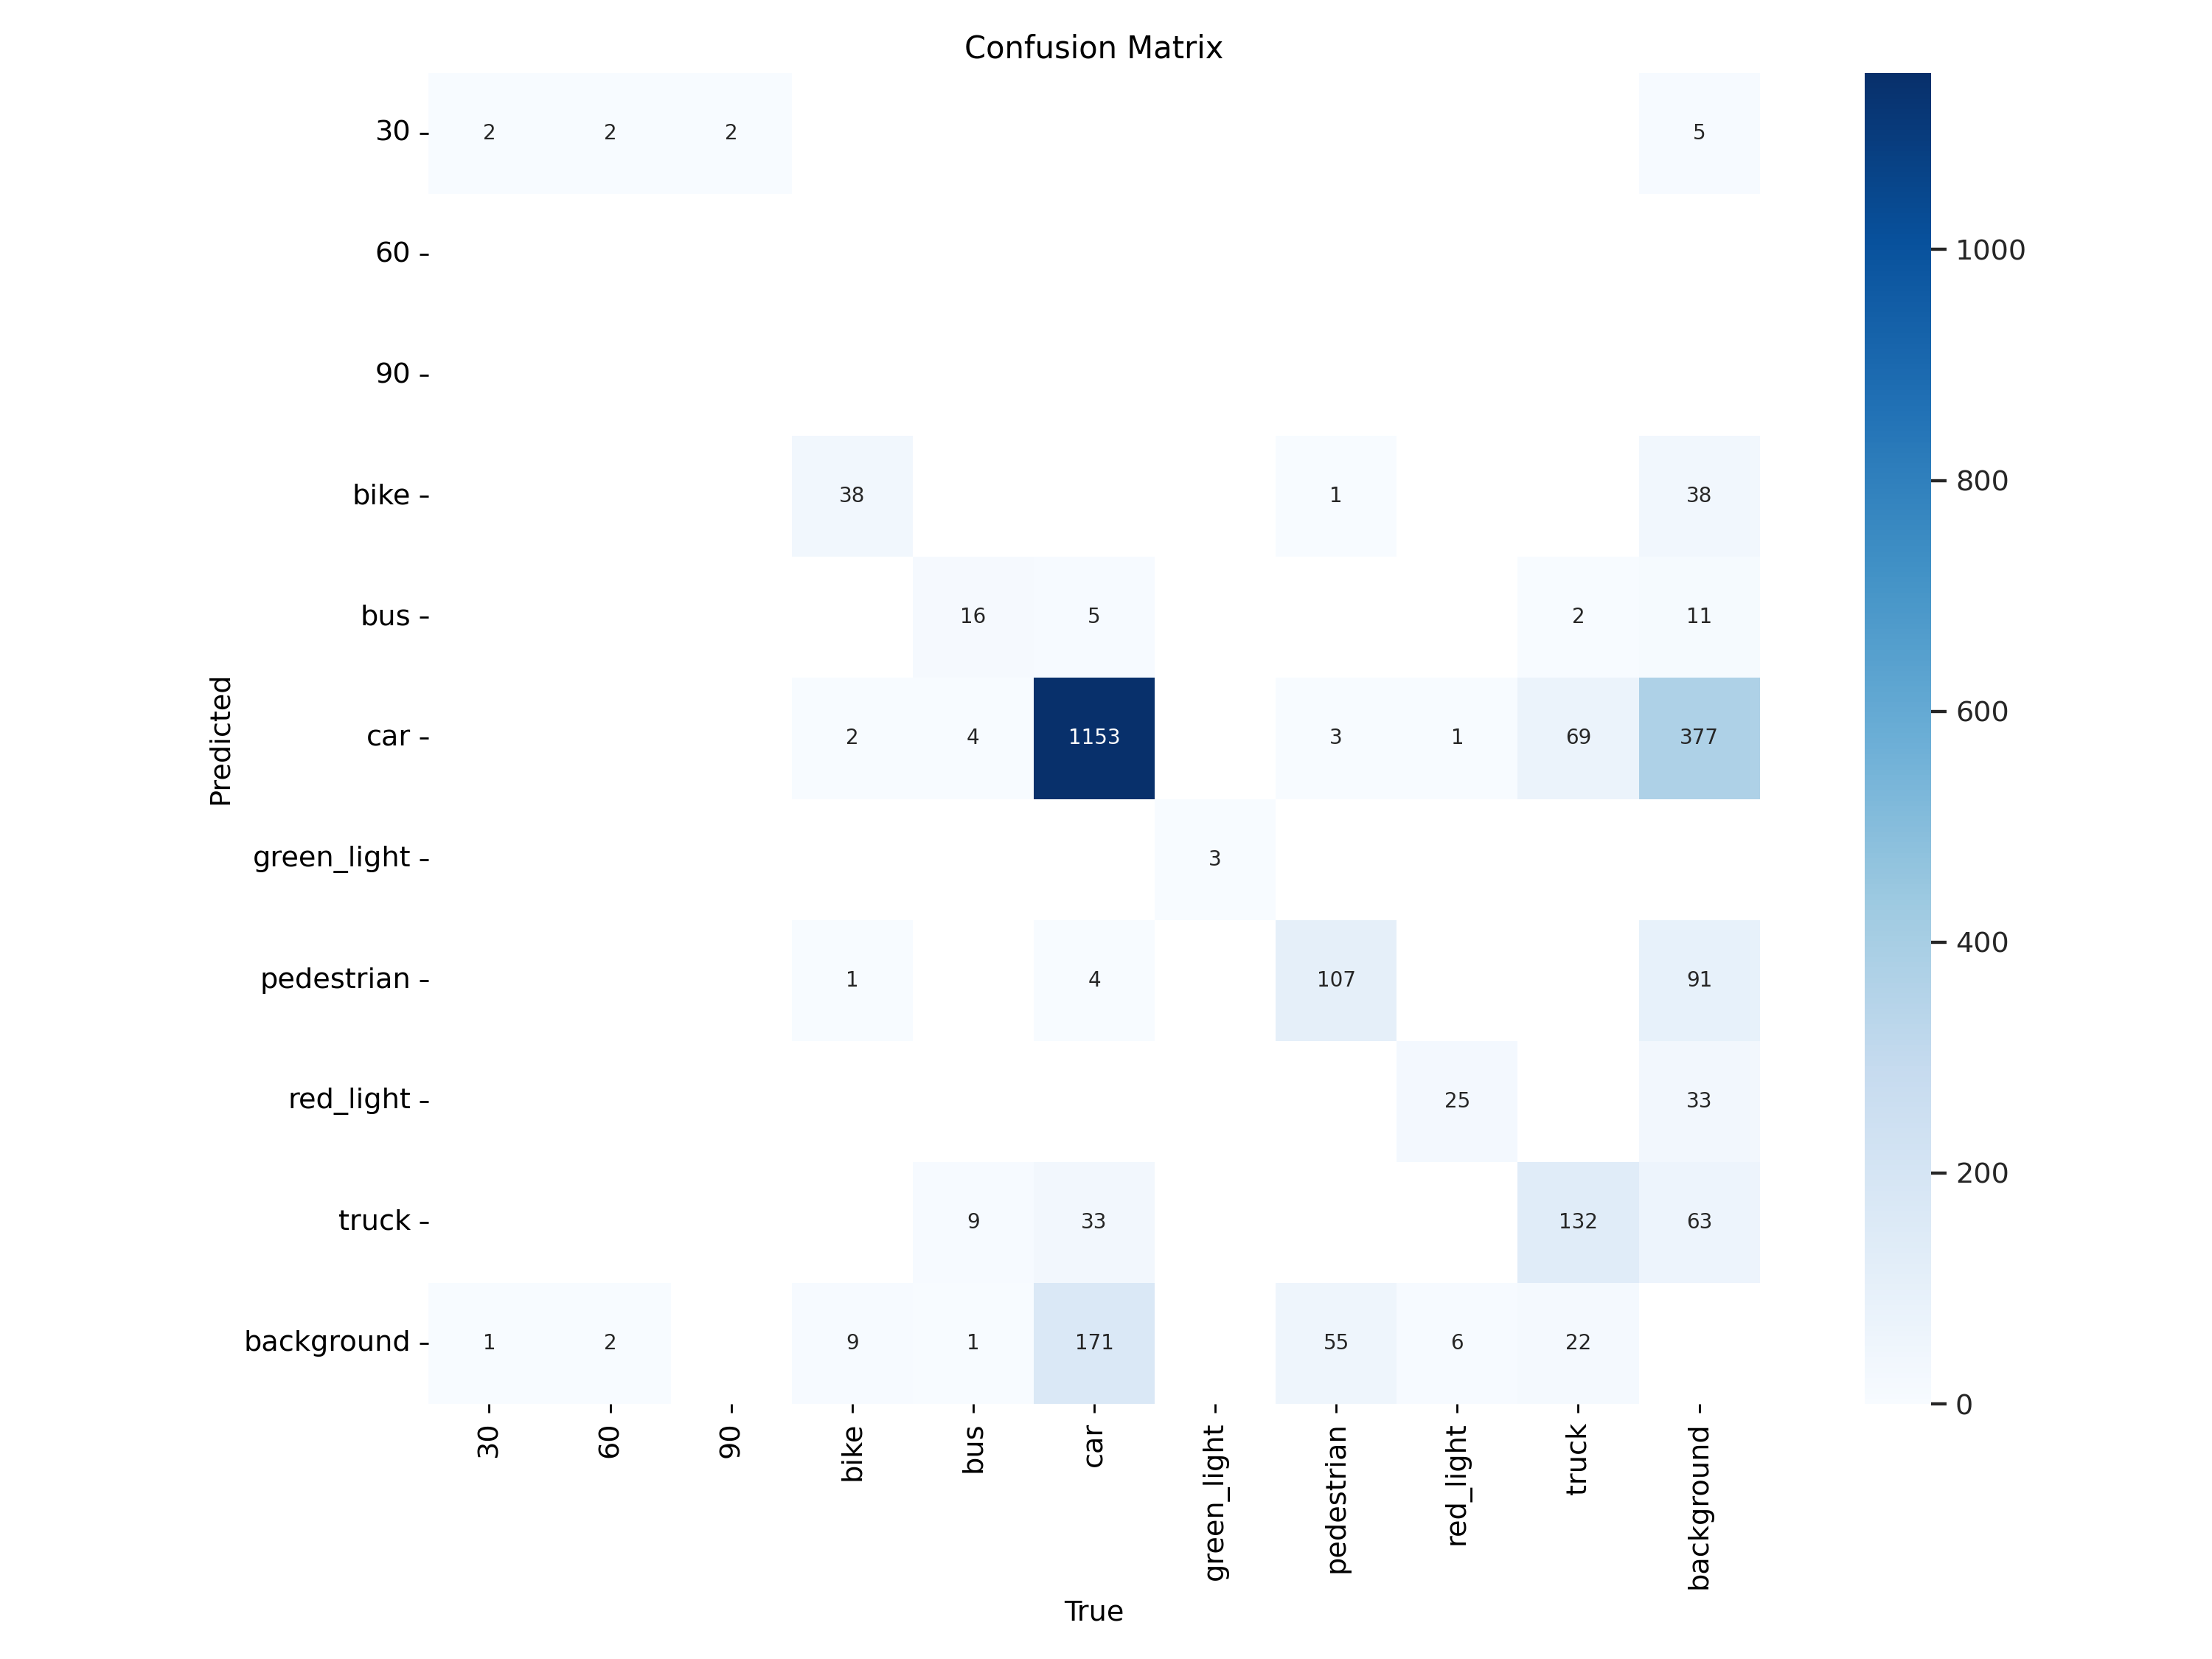

In [16]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

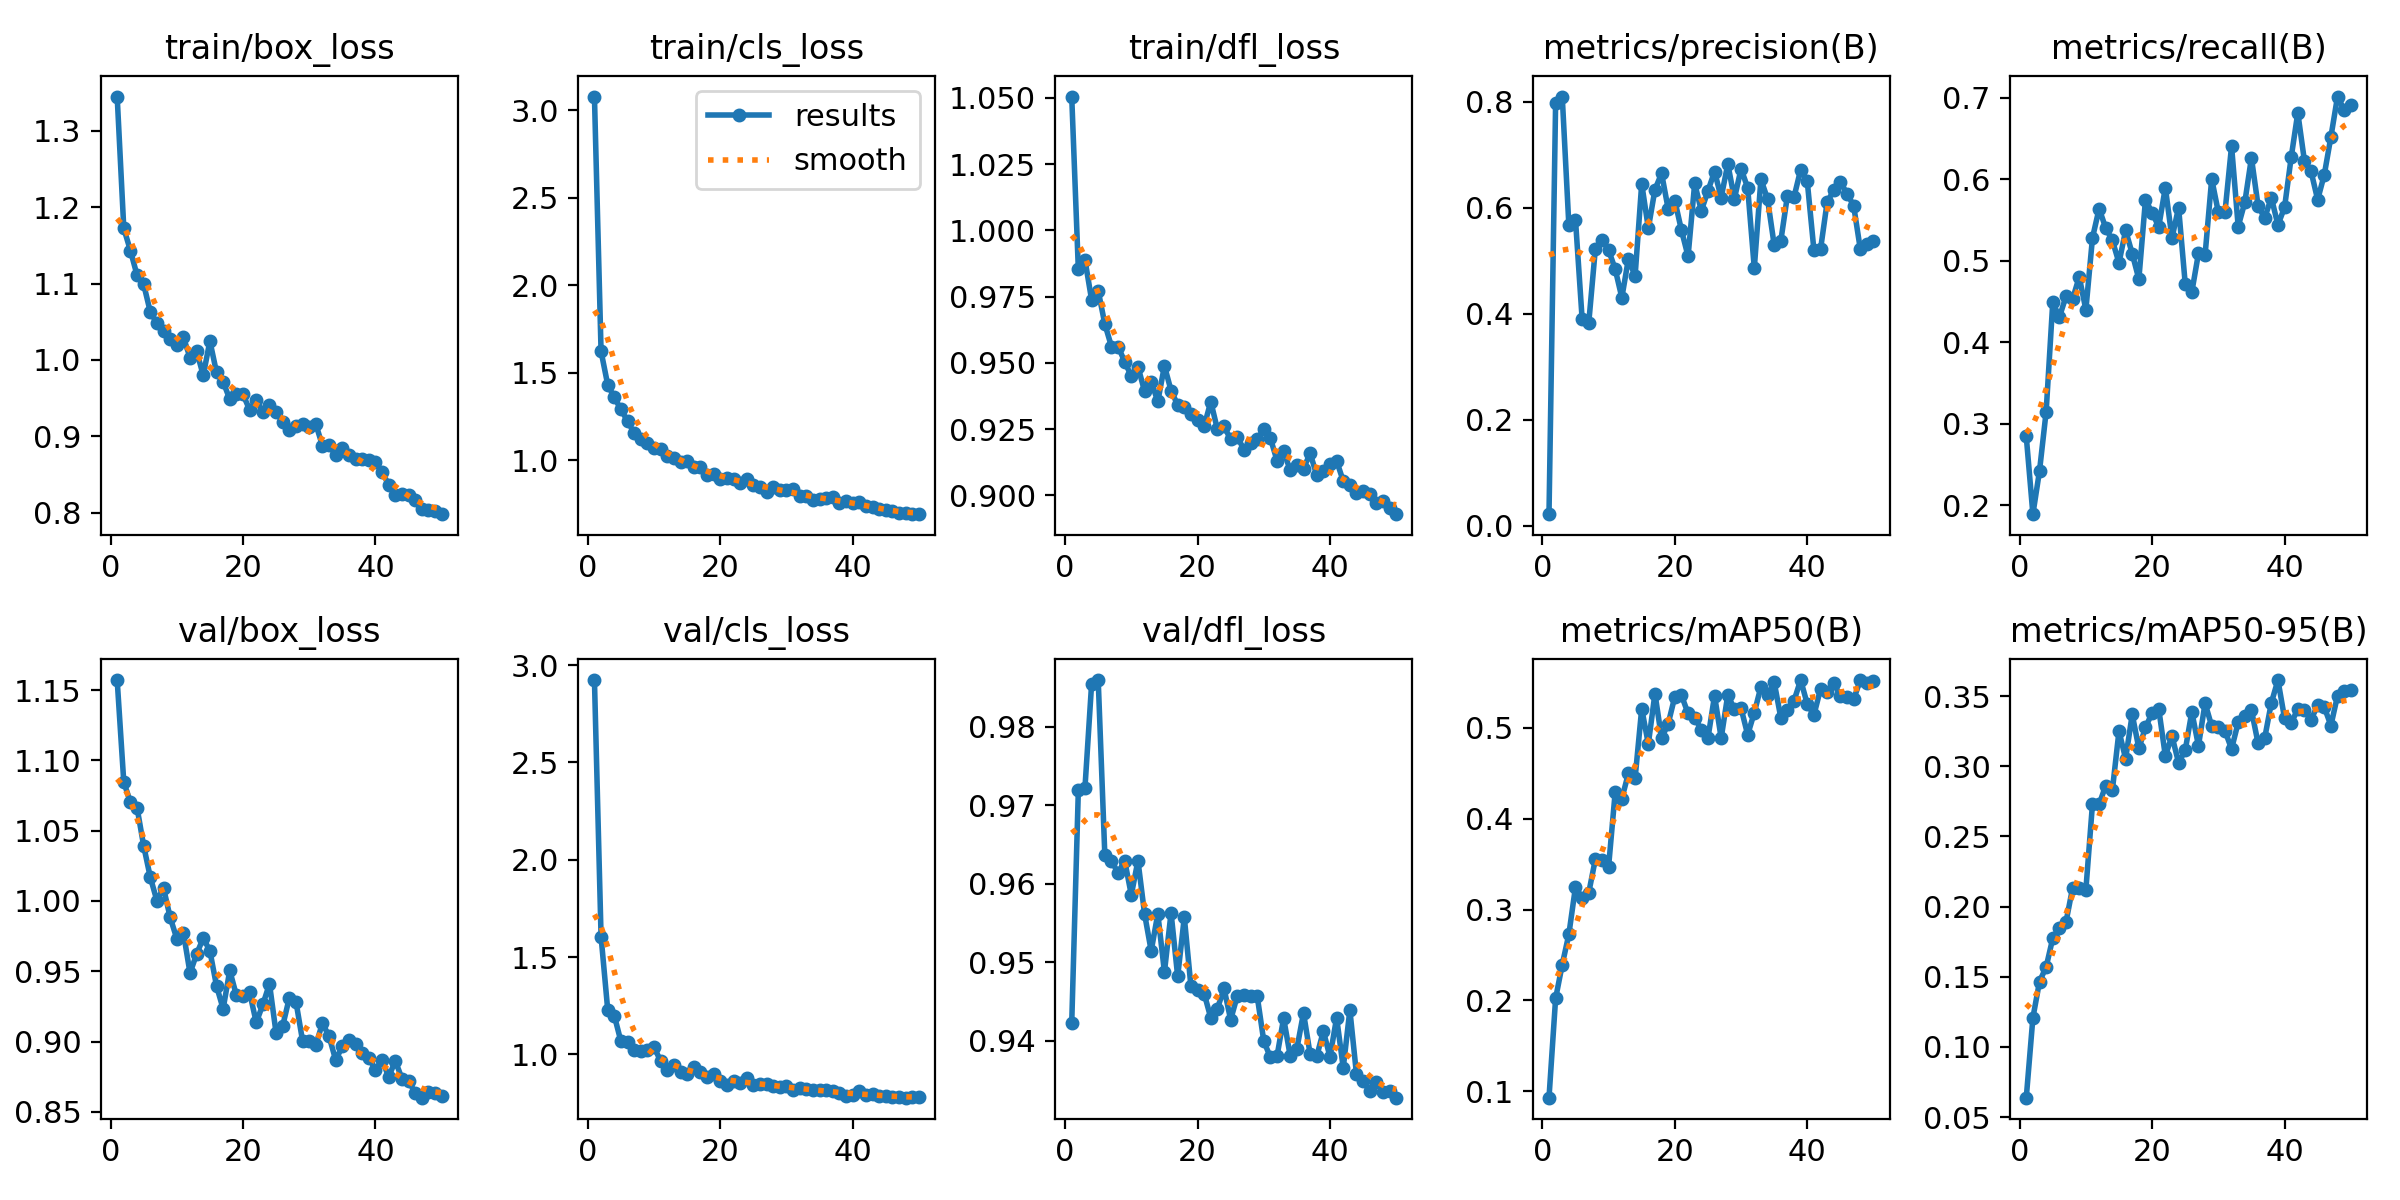

In [17]:
Image(filename=f'/content/runs/detect/train2/results.png', width=720, height=480)

In [20]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Carla_Object-detection-1/valid/labels.cache... 283 images, 1 backgrounds, 0 corrupt: 100% 283/283 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 18/18 [00:08<00:00,  2.24it/s]
                   all        283       1881      0.672      0.545      0.553      0.363
                    30        283          3        0.2      0.667      0.195      0.119
                    60        283          4          1          0      0.304     0.0864
                    90        283          2          1          0       0.17      0.102
                  bike        283         50      0.519      0.712      0.737      0.402
                   bus        283         30      0.554      0.467      0.496      0.313
                   car        283  

In [21]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs

image 1/141 /content/Carla_Object-detection-1/test/images/combined_20240823123303812803_jpeg.rf.01e387131881b03df43ced89a4eda645.jpg: 640x640 2 bikes, 7 cars, 2 trucks, 12.3ms
image 2/141 /content/Carla_Object-detection-1/test/images/combined_20240823123304438982_jpeg.rf.c4ce55e08072c4e112e598f9adea02e9.jpg: 640x640 2 bikes, 7 cars, 2 trucks, 7.4ms
image 3/141 /content/Carla_Object-detection-1/test/images/combined_20240823123304608490_jpeg.rf.e348be1a49c5bca9f1ddabf808c90cae.jpg: 640x640 2 bikes, 7 cars, 1 pedestrian, 2 trucks, 7.3ms
image 4/141 /content/Carla_Object-detection-1/test/images/combined_20240823123310068791_jpeg.rf.1668f2a59ded402d6de43b75795055c6.jpg: 640x640 1 bike, 5 cars, 1 pedestrian, 7.3ms
image 5/141 /content/Carla_Object-detection-1/test/images/combined_20240823123310480961_jpeg.rf.d294f34fa70bafedbd

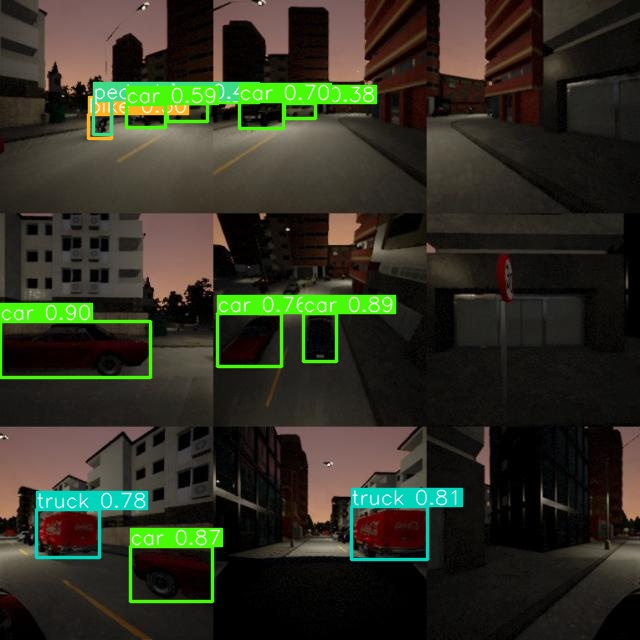

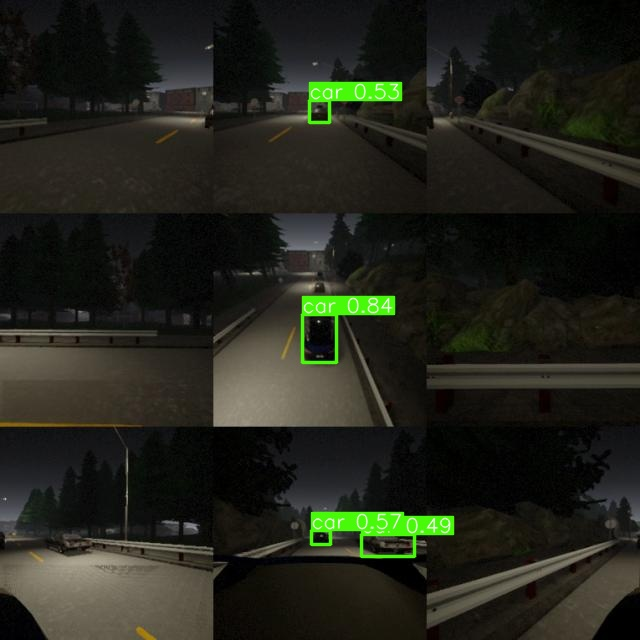

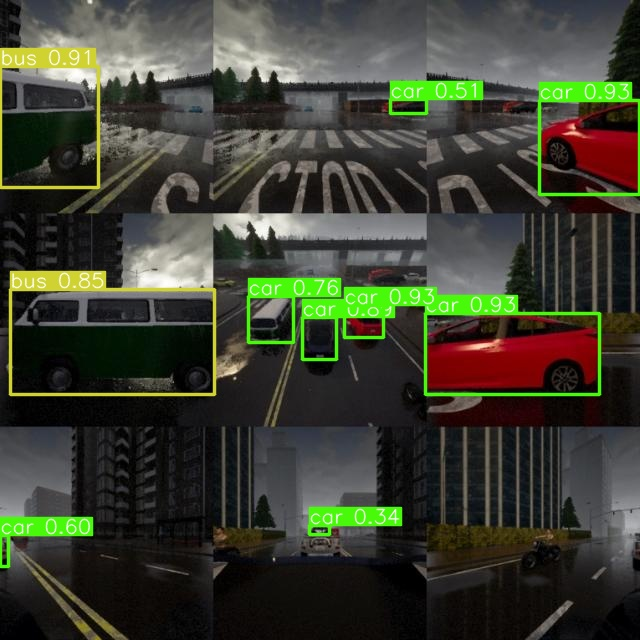

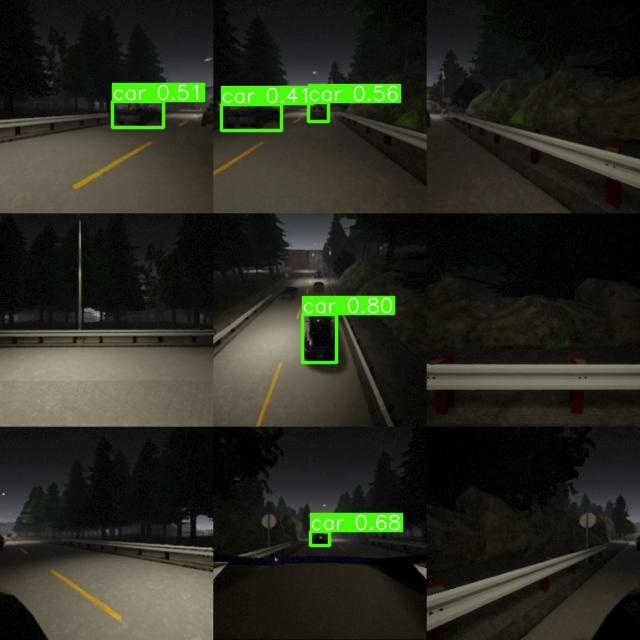

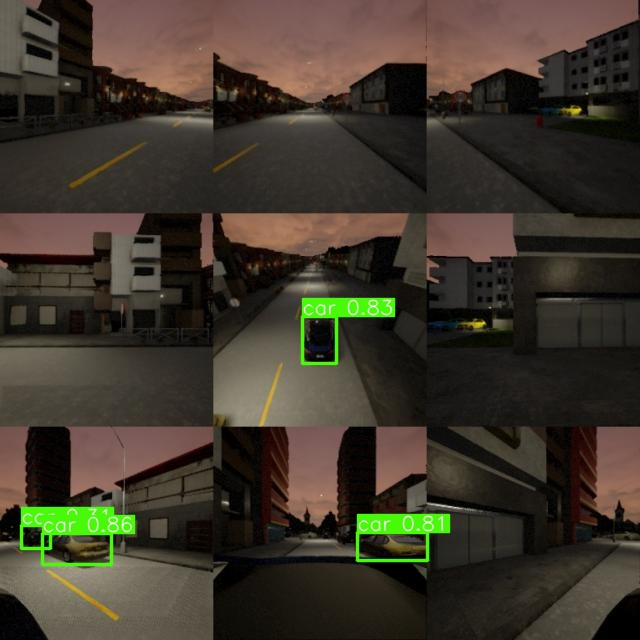

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:5]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [23]:
!zip -r yolov8_run.zip /content/runs/

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 8%)
  adding: content/runs/detect/val/R_curve.png (deflated 6%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 9%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 12%)
  adding: content/runs/detect/val/P_curve.png (deflated 6%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 24%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 13%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 20%)
  adding: content/runs/detect/val/PR_curve.png (deflated 8%)
  adding: content/runs/detect/val/F1_curve.png (deflated 5%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 8%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 9%)
  adding: content/runs/detect/predict2/ (stored 0%)
  adding: con

In [25]:
from google.colab import files
files.download('yolov8_run.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# %cd /root/.config/Ultralytics/

/root/.config/Ultralytics


In [ ]:
# from ultralytics import YOLO

# # Load a model
# model = YOLO("yolov8n.pt")  # build a new model from scratch

# # Use the model
# results = model.train(data="config.yaml", epochs=10, batch=1, optimizer="Adam")  # train the model